In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [212]:
df = pd.read_csv(r"C:\Users\JOSUE\Downloads\Preprocessing_BMW\bmw_pricing_v2.csv")

In [213]:
# pd.options.display.float_format = '{:.0f}'.format

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [215]:
df.describe()

,km,potencia,precio
count,4841,4842,4837
mean,140959,129,15832
std,60209,39,9223
min,-64,0,100
25%,102884,100,10800
50%,141080,120,14200
75%,175217,135,18600
max,1000376,423,178500


In [216]:
df.shape

(4843, 18)

In [217]:
df.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [218]:
''' cambiar de tipo todas la columnas a su formato, el kilometraje es negativo, el precio es 100, potencia 0, la marca la vamos a borrar'''

' cambiar de tipo todas la columnas a su formato, el kilometraje es negativo, el precio es 100, potencia 0, la marca la vamos a borrar'

array([[<Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'potencia'}>],
       [<Axes: title={'center': 'precio'}>, <Axes: >]], dtype=object)

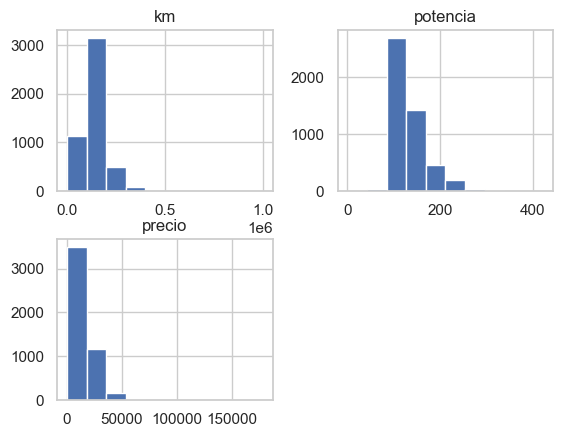

In [219]:
df.hist()

In [220]:
df.isnull().sum()

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [221]:
len(df[df.duplicated()])

0

In [222]:
# def plot_variables(df):
#     # Obtener listas de columnas por tipo de datos
#     numeric_cols = df.select_dtypes(include=['int', 'float']).columns
#     categorical_cols = df.select_dtypes(include=['object']).columns
#     boolean_cols = df.select_dtypes(include=['bool']).columns

#     # Graficar variables numéricas
#     for col in numeric_cols:
#         plt.figure(figsize=(8, 6))
#         plt.hist(df[col], bins=20)
#         plt.xlabel(col)
#         plt.ylabel('Frecuencia')
#         plt.title(f'Histograma de {col}')
#         plt.show()

#     # Graficar variables categóricas
#     for col in categorical_cols:
#         plt.figure(figsize=(8, 6))
#         df[col].value_counts().plot(kind='bar')
#         plt.xlabel(col)
#         plt.ylabel('Frecuencia')
#         plt.title(f'Gráfico de barras de {col}')
#         plt.show()

#     # Graficar variables booleanas
#     for col in boolean_cols:
#         plt.figure(figsize=(8, 6))
#         df[col].value_counts().plot(kind='bar')
#         plt.xlabel(col)
#         plt.ylabel('Frecuencia')
#         plt.title(f'Gráfico de barras de {col}')
#         plt.show()


# plot_variables(df)


# Realizaremos la imputacion de nulos ,cambios de formato

Encontré varios problemas en el conjunto de datos:

1-)Algunas columnas están almacenadas como objetos, pero deberían ser booleanas,pd.datetime ya que contienen valores de verdadero o falso. Las cambiaré a tipo booleano.       

2-)La columna 'marca' no es necesaria y la eliminaré.


3-)Revisaré si hay filas con valores nulos (sin información) y tomaré decisiones sobre cómo rellenarlos o eliminarlos, asegurándome de que no afecten los resultados.(regla si los datos son nulos mas del 10% de las entradas en tu variable tienes que ver como rellenarla o depende si tu infromacion es muy valiosa para borrar yo las borrare por efectos de aprendisaje

4)También encontré un nombre repetido en la columna de gasolinas, simplemente convertiré todo a minúsculas y me quedaré con el primer nombre para corregirlo.

5)Eliminaré filas duplicadas si las hubiera.

Anomalias de outliers, atipicas en los datos



In [223]:
df.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [224]:
columnas_convertir = ['bluetooth', 'elevalunas_electrico', 'asientos_traseros_plegables', 'camara_trasera', 'aire_acondicionado', 'volante_regulable', 'alerta_lim_velocidad' ]

In [225]:
df[columnas_convertir] = df[columnas_convertir].astype(bool)

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4843 non-null   bool   
 9   aire_acondicionado           4843 non-null   bool   
 10  camara_trasera               4843 non-null   bool   
 11  asientos_traseros_plegables  4843 non-null   bool   
 12  elevalunas_electrico         4843 non-null   bool   
 13  bluetooth         

In [227]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'])

In [228]:
df['fecha_registro'] = pd.to_datetime(df['fecha_registro'])

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   marca                        4841 non-null   object        
 1   modelo                       4840 non-null   object        
 2   km                           4841 non-null   float64       
 3   potencia                     4842 non-null   float64       
 4   fecha_registro               4842 non-null   datetime64[ns]
 5   tipo_gasolina                4838 non-null   object        
 6   color                        4831 non-null   object        
 7   tipo_coche                   4834 non-null   object        
 8   volante_regulable            4843 non-null   bool          
 9   aire_acondicionado           4843 non-null   bool          
 10  camara_trasera               4843 non-null   bool          
 11  asientos_traseros_plegables  4843 non-null 

In [230]:
df.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,BMW,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,BMW,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,BMW,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,BMW,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [231]:
del df['marca']

In [232]:
df.head(5)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01
1,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01
2,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01
3,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01
4,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01


In [233]:
df.isnull().sum()

modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               0
aire_acondicionado              0
camara_trasera                  0
asientos_traseros_plegables     0
elevalunas_electrico            0
bluetooth                       0
gps                             0
alerta_lim_velocidad            0
precio                          6
fecha_venta                     1
dtype: int64

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4840 non-null   object        
 1   km                           4841 non-null   float64       
 2   potencia                     4842 non-null   float64       
 3   fecha_registro               4842 non-null   datetime64[ns]
 4   tipo_gasolina                4838 non-null   object        
 5   color                        4831 non-null   object        
 6   tipo_coche                   4834 non-null   object        
 7   volante_regulable            4843 non-null   bool          
 8   aire_acondicionado           4843 non-null   bool          
 9   camara_trasera               4843 non-null   bool          
 10  asientos_traseros_plegables  4843 non-null   bool          
 11  elevalunas_electrico         4843 non-null 

In [235]:
df.dropna(inplace=True)

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 0 to 4841
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4803 non-null   object        
 1   km                           4803 non-null   float64       
 2   potencia                     4803 non-null   float64       
 3   fecha_registro               4803 non-null   datetime64[ns]
 4   tipo_gasolina                4803 non-null   object        
 5   color                        4803 non-null   object        
 6   tipo_coche                   4803 non-null   object        
 7   volante_regulable            4803 non-null   bool          
 8   aire_acondicionado           4803 non-null   bool          
 9   camara_trasera               4803 non-null   bool          
 10  asientos_traseros_plegables  4803 non-null   bool          
 11  elevalunas_electrico         4803 non-null   boo

In [237]:
df['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4598
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64

In [238]:
df['tipo_gasolina'] = df['tipo_gasolina'].str.lower()

In [239]:
df['tipo_gasolina'].value_counts()

tipo_gasolina
diesel           4603
petrol            189
hybrid_petrol       8
electro             3
Name: count, dtype: int64

In [240]:
df.duplicated().sum()

0

In [241]:
df.describe()

,km,potencia,fecha_registro,precio,fecha_venta
count,4803,4803,4803,4803,4803
mean,140894,129,2012-11-23 15:24:37.326670592,15865,2018-04-26 12:33:07.757651456
min,-64,0,1990-03-01 00:00:00,100,2007-08-01 00:00:00
25%,102604,100,2012-07-01 00:00:00,10900,2018-03-01 00:00:00
50%,140829,120,2013-07-01 00:00:00,14200,2018-05-01 00:00:00
75%,175226,135,2014-04-01 00:00:00,18700,2018-07-01 00:00:00
max,1000376,423,2017-11-01 00:00:00,178500,2018-09-01 00:00:00
std,60265,39,NaN,9230,NaN


# Data Engineering & agrupaciones
1)Crearemos una columna de tiempo que pasa para vender cada vehiculo

2)Extraeremos el year y el mes de fecha de registro y alamacenarlos en columnas separadas.

3)Agruparemos los modelos de BMW ya que son demasiados

anomalias distribucion del target , correlacion


In [242]:
df.reset_index(drop=True, inplace=True)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   modelo                       4803 non-null   object        
 1   km                           4803 non-null   float64       
 2   potencia                     4803 non-null   float64       
 3   fecha_registro               4803 non-null   datetime64[ns]
 4   tipo_gasolina                4803 non-null   object        
 5   color                        4803 non-null   object        
 6   tipo_coche                   4803 non-null   object        
 7   volante_regulable            4803 non-null   bool          
 8   aire_acondicionado           4803 non-null   bool          
 9   camara_trasera               4803 non-null   bool          
 10  asientos_traseros_plegables  4803 non-null   bool          
 11  elevalunas_electrico         4803 non-null 

In [244]:
df['tiemo_venta'] = ((df['fecha_venta'] - df['fecha_registro']).dt.days) // 30

In [245]:
df.head(5)

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,tiemo_venta
0,118,140411,100,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,2018-01-01,72
1,M4,13929,317,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,2018-02-01,22
2,320,183297,120,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,2018-02-01,71
3,420,128035,135,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,2018-02-01,43
4,425,97097,160,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,2018-04-01,40


In [246]:
df['year_registro'] = df['fecha_registro'].dt.year
df['mes_registro'] = df['fecha_registro'].dt.month

df['year_venta'] = df['fecha_venta'].dt.year
df['mes_venta'] = df['fecha_venta'].dt.month

df.drop(['fecha_registro', 'fecha_venta'], axis=1, inplace=True)




In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4803 non-null   object 
 1   km                           4803 non-null   float64
 2   potencia                     4803 non-null   float64
 3   tipo_gasolina                4803 non-null   object 
 4   color                        4803 non-null   object 
 5   tipo_coche                   4803 non-null   object 
 6   volante_regulable            4803 non-null   bool   
 7   aire_acondicionado           4803 non-null   bool   
 8   camara_trasera               4803 non-null   bool   
 9   asientos_traseros_plegables  4803 non-null   bool   
 10  elevalunas_electrico         4803 non-null   bool   
 11  bluetooth                    4803 non-null   bool   
 12  gps                          4803 non-null   bool   
 13  alerta_lim_velocid

In [248]:
df.head(5)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta
0,118,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,72,2012,2,2018,1
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,22,2016,4,2018,2
2,320,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,71,2012,4,2018,2
3,420,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,43,2014,7,2018,2
4,425,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,40,2014,12,2018,4


In [249]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['modelo'].value_counts())

modelo
320                  745
520                  629
318                  556
X3                   437
116                  356
X1                   273
316                  233
X5                   231
525                  181
530                  157
118                  141
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
X4                    46
535                   46
X6                    44
420                   42
120                   36
420 Gran Coupé        33
730                   33
330                   32
520 Gran Turismo      23
325                   19
640 Gran Coupé        19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
M550                  12
218                   12
218 Gran Tourer        9
640                    8
418 Gran Coupé         8
X6 M                   8
M3                     7
335                    7
435 Gran Coupé         6
Z4                

In [250]:
def group_models(modelo):
    series_validas =['1', '2', '3', '4', '5', '6', '7']

    if modelo.startswith('X'):
       return 'XSERIES'

    if modelo.startswith('M550'):
        return 'M5'

    for prefijo in series_validas:
       if modelo.startswith(prefijo):
        return 'M' + prefijo

    return 'Otros'

df['modelo_agrupado'] = df['modelo'].apply(group_models)



In [251]:
df.head(5)

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,...,bluetooth,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,modelo_agrupado
0,118,140411,100,diesel,black,convertible,True,True,False,False,...,True,True,False,11300,72,2012,2,2018,1,M1
1,M4,13929,317,petrol,grey,convertible,True,True,False,False,...,True,True,True,69700,22,2016,4,2018,2,Otros
2,320,183297,120,diesel,white,convertible,False,False,False,False,...,False,True,False,10200,71,2012,4,2018,2,M3
3,420,128035,135,diesel,red,convertible,True,True,False,False,...,True,True,True,25100,43,2014,7,2018,2,M4
4,425,97097,160,diesel,silver,convertible,True,True,False,False,...,True,True,True,33400,40,2014,12,2018,4,M4


In [252]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df['modelo_agrupado'].value_counts())

modelo_agrupado
M3         1777
M5         1144
XSERIES    1059
M1          559
M4          101
M7           54
M2           49
M6           31
Otros        29
Name: count, dtype: int64


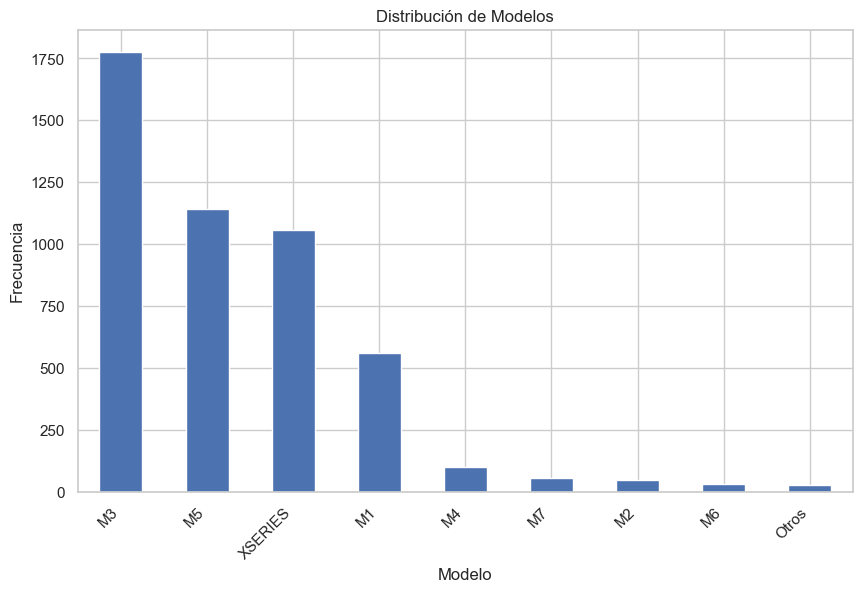

In [253]:
import matplotlib.pyplot as plt

# Obtén los valores y cuentas de la columna 'modelo'
value_counts = df['modelo_agrupado'].value_counts()

# Crea una figura más grande
plt.figure(figsize=(10, 6))

# Crea el gráfico de barras
ax = value_counts.plot(kind='bar')

# Personaliza las etiquetas del eje x para que sean más legibles
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Agrega etiquetas y título
plt.xlabel('Modelo')
plt.ylabel('Frecuencia')
plt.title('Distribución de Modelos')

# Muestra el gráfico
plt.show()

In [254]:
del df['modelo']

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4803 non-null   float64
 1   potencia                     4803 non-null   float64
 2   tipo_gasolina                4803 non-null   object 
 3   color                        4803 non-null   object 
 4   tipo_coche                   4803 non-null   object 
 5   volante_regulable            4803 non-null   bool   
 6   aire_acondicionado           4803 non-null   bool   
 7   camara_trasera               4803 non-null   bool   
 8   asientos_traseros_plegables  4803 non-null   bool   
 9   elevalunas_electrico         4803 non-null   bool   
 10  bluetooth                    4803 non-null   bool   
 11  gps                          4803 non-null   bool   
 12  alerta_lim_velocidad         4803 non-null   bool   
 13  precio            

In [256]:
df.head(5)

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,modelo_agrupado
0,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,False,11300,72,2012,2,2018,1,M1
1,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700,22,2016,4,2018,2,Otros
2,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,False,10200,71,2012,4,2018,2,M3
3,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,True,25100,43,2014,7,2018,2,M4
4,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400,40,2014,12,2018,4,M4


In [257]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta
count,4803,4803,4803,4803,4803,4803,4803,4803
mean,140894,129,15865,65,2012,6,2018,5
std,60265,39,9230,31,3,3,0,2
min,-64,0,100,-67,1990,1,2007,1
25%,102604,100,10900,49,2012,3,2018,3
50%,140829,120,14200,58,2013,6,2018,5
75%,175226,135,18700,71,2014,9,2018,7
max,1000376,423,178500,341,2017,12,2018,9


In [258]:
pd.options.display.float_format = '{:.0f}'.format

In [259]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta
count,4803,4803,4803,4803,4803,4803,4803,4803
mean,140894,129,15865,65,2012,6,2018,5
std,60265,39,9230,31,3,3,0,2
min,-64,0,100,-67,1990,1,2007,1
25%,102604,100,10900,49,2012,3,2018,3
50%,140829,120,14200,58,2013,6,2018,5
75%,175226,135,18700,71,2014,9,2018,7
max,1000376,423,178500,341,2017,12,2018,9


# Anomalias
1) variable km

2) potencia

3)tiempo venta

4)precio

siguiente sera distribucion del target y correlacion

In [260]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta
count,4803,4803,4803,4803,4803,4803,4803,4803
mean,140894,129,15865,65,2012,6,2018,5
std,60265,39,9230,31,3,3,0,2
min,-64,0,100,-67,1990,1,2007,1
25%,102604,100,10900,49,2012,3,2018,3
50%,140829,120,14200,58,2013,6,2018,5
75%,175226,135,18700,71,2014,9,2018,7
max,1000376,423,178500,341,2017,12,2018,9


In [261]:
df[df['km'] < 100]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,modelo_agrupado
2908,-64,230,diesel,black,sedan,True,True,False,True,False,False,True,True,75000,13,2017,3,2018,4,M6


In [262]:
df['km'] = df['km'].abs()

In [263]:
df[df['potencia'] == 0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,modelo_agrupado
3729,81770,0,diesel,white,suv,False,False,False,False,False,False,False,False,11700,41,2014,10,2018,3,XSERIES


In [264]:
incorrect_potencia = df[df['potencia'] == 0]

In [265]:
df.drop(incorrect_potencia.index,inplace=True)

In [266]:
df[df['tiemo_venta'] < 0]

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,modelo_agrupado
42,142483,180,diesel,blue,convertible,True,True,False,False,True,False,True,True,15800,-54,2012,1,2007,8,M3
99,342768,135,diesel,black,coupe,False,True,False,False,True,False,True,False,8200,-21,2011,12,2010,4,M3
177,181052,120,diesel,black,estate,False,True,False,False,False,False,True,True,11500,-67,2014,10,2009,4,M3
248,201102,85,diesel,black,estate,True,False,False,False,False,False,True,False,8800,-67,2013,12,2008,6,M3


In [267]:
tiempo_de_venta_incorrecto = df[df['tiemo_venta'] < 0]

In [268]:
df.loc[tiempo_de_venta_incorrecto.index, "tiemo_venta"] = np.abs(tiempo_de_venta_incorrecto['tiemo_venta'])

In [269]:
df_outiler = df[df['precio'] < 1500]

In [270]:
len(df_outiler)

85

In [271]:
df = df[df['precio'] >= 1500]

In [272]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta
count,4717,4717,4717,4717,4717,4717,4717,4717
mean,139448,129,16137,64,2013,6,2018,5
std,57527,39,9088,27,2,3,0,2
min,64,25,1500,7,1995,1,2007,1
25%,101705,100,11100,49,2012,3,2018,3
50%,140084,120,14300,58,2013,6,2018,5
75%,174690,135,18800,71,2014,9,2018,7
max,484615,423,178500,274,2017,12,2018,9


#Distribucion del Target y Correlacion

1)Explicaremos las clases de distribucion que existen

2)Que es skew (sesgo)

3)Funciones para normalizar la distribucion

4)Correlacion entre variables



<Axes: >

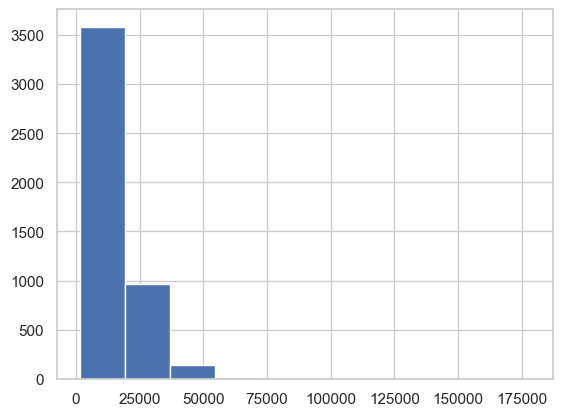

In [273]:
df['precio'].hist()

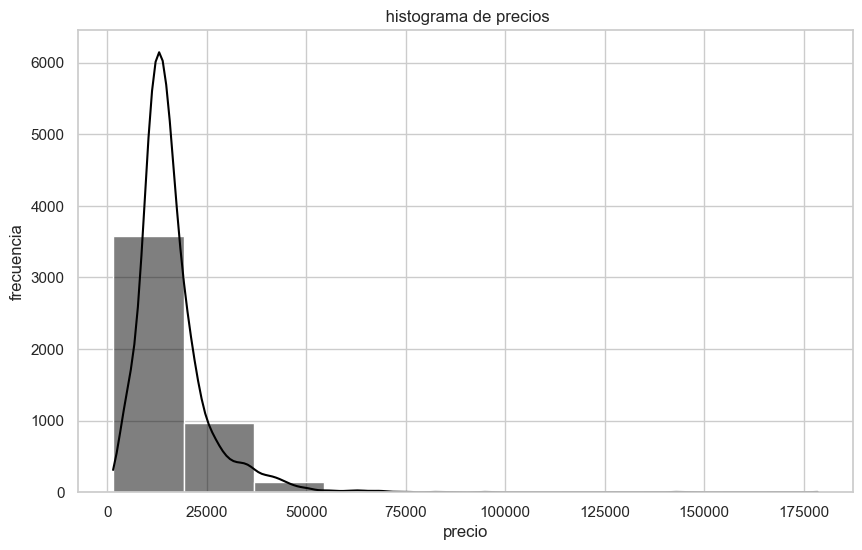

In [274]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))

sns.histplot(df['precio'], kde=True, color="black", bins=10)

plt.xlabel('precio')
plt.ylabel('frecuencia')
plt.title(" histograma de precios")

plt.show()

In [275]:
from scipy.stats import skew
sesgo = df['precio'].skew()
print(sesgo)

3.550878353760721


In [276]:
# df['precio_sqrt'] = np.sqrt(df['precio'])

In [277]:
# sesgo1 = df['precio_sqrt'].skew()
# print(sesgo1)

In [278]:
df['precio_log10'] = np.log10(df['precio'])

In [279]:
sesgo2 = df['precio_log10'].skew()
print(sesgo2)

-0.2702769930592099


In [280]:
# df['precio_inversa'] = 1 / df['precio']

In [281]:
# sesgo3 = df['precio_inversa'].skew()
# print(sesgo2)

In [282]:
print(sesgo)
# print(sesgo1)
print(sesgo2)
# print(sesgo3)

3.550878353760721
-0.2702769930592099


array([[<Axes: title={'center': 'precio'}>,
        <Axes: title={'center': 'precio_log10'}>]], dtype=object)

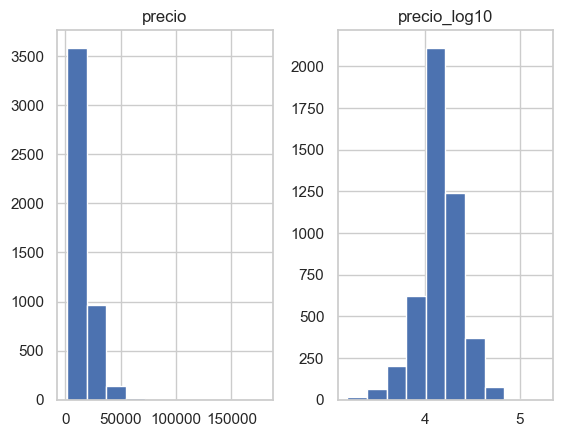

In [283]:
df.hist(column=['precio', 'precio_log10'])

In [284]:
data ={'columna_negativa': -np.random.randint(1, 1000, size=100)}

data['columna_negativa'] -= min(data['columna_negativa']) - 1000

df1 = pd.DataFrame(data)


array([[<Axes: title={'center': 'columna_negativa'}>]], dtype=object)

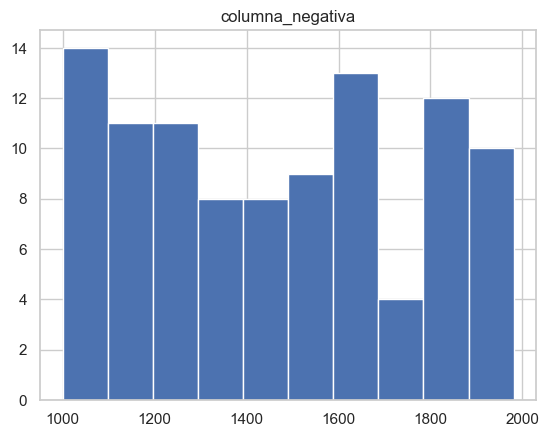

In [285]:
df1.hist()

In [286]:
sesgo_negativo = df1['columna_negativa'].skew()
print(sesgo_negativo)

0.10432887455507504


In [287]:
df1['columna_cubica'] = np.cbrt(-df1['columna_negativa'])

In [288]:
sesgo_negativo1 = df1['columna_cubica'].skew()
print(sesgo_negativo1)

0.041558333010025574


In [289]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [290]:
df1['columna_zscore'] = scaler.fit_transform(-df1['columna_negativa'].values.reshape(-1, 1))

In [291]:
sesgo_negativo2 = df1['columna_zscore'].skew()
print(sesgo_negativo2)

-0.10432887455507568


In [292]:
print(sesgo_negativo)
print(sesgo_negativo1)
print(sesgo_negativo2)


0.10432887455507504
0.041558333010025574
-0.10432887455507568


array([[<Axes: title={'center': 'columna_negativa'}>,
        <Axes: title={'center': 'columna_cubica'}>],
       [<Axes: title={'center': 'columna_zscore'}>, <Axes: >]],
      dtype=object)

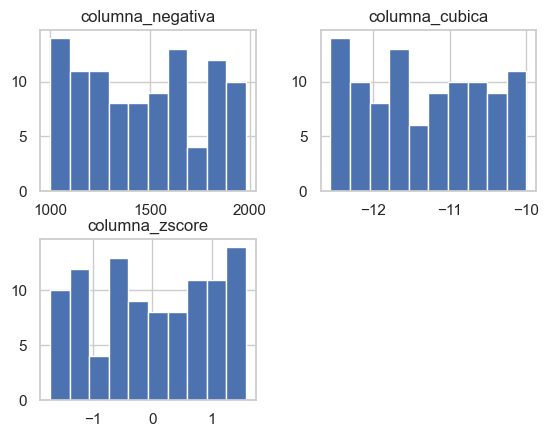

In [293]:
df1.hist(column=['columna_negativa','columna_cubica', 'columna_zscore'])

In [294]:
df.shape

(4717, 21)

In [295]:
df.describe()

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,precio_log10
count,4717,4717,4717,4717,4717,4717,4717,4717,4717
mean,139448,129,16137,64,2013,6,2018,5,4
std,57527,39,9088,27,2,3,0,2,0
min,64,25,1500,7,1995,1,2007,1,3
25%,101705,100,11100,49,2012,3,2018,3,4
50%,140084,120,14300,58,2013,6,2018,5,4
75%,174690,135,18800,71,2014,9,2018,7,4
max,484615,423,178500,274,2017,12,2018,9,5


Creo una copia para revertir el data frame original despues de utilzar el mapa de correlaciones ya que hare un dataframe que solo contenga las variables numericas

In [296]:
df_original = df.copy()

In [297]:
df = df.select_dtypes(include=['number'])  # Keep only numeric columns
corr = df.corr()


En el heatmap pueden apreciar la correlacion entre las dos variables que son las mismas precio y precio log , como hablan de lo mismo una de ellas tiene que ser eliminada si no a la hora del entrenamiento va overfitting lo veremos en el entrenamiento de modelo como afecta lo comento para que lo tengan en cuenta

In [298]:
corr.style.background_gradient(cmap="coolwarm")

,km,potencia,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,precio_log10
km,1.000000,-0.032871,-0.400994,0.487513,-0.490077,-0.010417,-0.035089,-0.010965,-0.449437
potencia,-0.032871,1.000000,0.643228,-0.052053,0.050417,-0.002715,-0.001349,-0.029809,0.602692
precio,-0.400994,0.643228,1.000000,-0.439163,0.445342,-0.025954,0.015275,0.008671,0.889860
tiemo_venta,0.487513,-0.052053,-0.439163,1.000000,-0.988036,-0.024857,0.011283,0.129345,-0.614876
year_registro,-0.490077,0.050417,0.445342,-0.988036,1.000000,-0.101690,0.000752,-0.047099,0.619788
mes_registro,-0.010417,-0.002715,-0.025954,-0.024857,-0.101690,1.000000,-0.019174,-0.014046,-0.028040
year_venta,-0.035089,-0.001349,0.015275,0.011283,0.000752,-0.019174,1.000000,-0.010079,0.015177
mes_venta,-0.010965,-0.029809,0.008671,0.129345,-0.047099,-0.014046,-0.010079,1.000000,-0.014027
precio_log10,-0.449437,0.602692,0.889860,-0.614876,0.619788,-0.028040,0.015177,-0.014027,1.000000


Revierto el dataframe original

In [299]:
df = df_original.copy()

In [300]:
df.head()

,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,...,gps,alerta_lim_velocidad,precio,tiemo_venta,year_registro,mes_registro,year_venta,mes_venta,modelo_agrupado,precio_log10
0,140411,100,diesel,black,convertible,True,True,False,False,True,...,True,False,11300,72,2012,2,2018,1,M1,4
1,13929,317,petrol,grey,convertible,True,True,False,False,False,...,True,True,69700,22,2016,4,2018,2,Otros,5
2,183297,120,diesel,white,convertible,False,False,False,False,True,...,True,False,10200,71,2012,4,2018,2,M3,4
3,128035,135,diesel,red,convertible,True,True,False,False,True,...,True,True,25100,43,2014,7,2018,2,M4,4
4,97097,160,diesel,silver,convertible,True,True,False,False,False,...,True,True,33400,40,2014,12,2018,4,M4,5


# Encodificar variables categoricas & Guardar df_limpio
1) OrdinalEncoder

2) get.dummies

3)Guardarlo el data final limpio en un formato apropiado para la creacion del modelo de regresion para predecir el precio




In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4717 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   tipo_gasolina                4717 non-null   object 
 3   color                        4717 non-null   object 
 4   tipo_coche                   4717 non-null   object 
 5   volante_regulable            4717 non-null   bool   
 6   aire_acondicionado           4717 non-null   bool   
 7   camara_trasera               4717 non-null   bool   
 8   asientos_traseros_plegables  4717 non-null   bool   
 9   elevalunas_electrico         4717 non-null   bool   
 10  bluetooth                    4717 non-null   bool   
 11  gps                          4717 non-null   bool   
 12  alerta_lim_velocidad         4717 non-null   bool   
 13  precio                 

In [302]:
df.reset_index(drop=True, inplace=True)

In [303]:
target = ['precio']

In [304]:
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2 and i not in target:
             lista_numericas.append(i)
        elif (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i" or dataset[i].dtype.kind=="b") and len(dataset[i].unique())== 2 and i not in target:
              lista_boolean.append(i)
        elif (dataset[i].dtype.kind=="O") and i not in target:
              lista_categoricas.append(i)


    return lista_numericas, lista_boolean, lista_categoricas

In [305]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(df)

In [306]:
lista_categoricas

['tipo_gasolina', 'color', 'tipo_coche', 'modelo_agrupado']

In [307]:
df = pd.get_dummies(df, columns=lista_categoricas)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int32  
 13  mes_registro      

In [309]:
df.head(10)

,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,...,tipo_coche_van,modelo_agrupado_M1,modelo_agrupado_M2,modelo_agrupado_M3,modelo_agrupado_M4,modelo_agrupado_M5,modelo_agrupado_M6,modelo_agrupado_M7,modelo_agrupado_Otros,modelo_agrupado_XSERIES
0,140411,100,True,True,False,False,True,True,True,False,...,False,True,False,False,False,False,False,False,False,False
1,13929,317,True,True,False,False,False,True,True,True,...,False,False,False,False,False,False,False,False,True,False
2,183297,120,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False
3,128035,135,True,True,False,False,True,True,True,True,...,False,False,False,False,True,False,False,False,False,False
4,97097,160,True,True,False,False,False,True,True,True,...,False,False,False,False,True,False,False,False,False,False
5,152352,225,True,True,False,False,True,True,True,True,...,False,False,False,True,False,False,False,False,False,False
6,205219,145,True,True,False,False,True,True,True,True,...,False,False,False,True,False,False,False,False,False,False
7,115560,105,True,True,False,False,False,True,True,False,...,False,True,False,False,False,False,False,False,False,False
8,123886,125,True,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
9,139541,135,False,False,False,False,True,False,True,False,...,False,False,False,True,False,False,False,False,False,False


In [310]:
# guardar csv powerbi,tableu

In [313]:
df.to_csv("C:/Users/JOSUE/Downloads/Preprocessing_BMW/Bmw_Preprocessing/Data/Visualizaciones.csv", index=False)

In [314]:
df21 = pd.read_csv(r"C:\Users\JOSUE\Downloads\Preprocessing_BMW\Bmw_Preprocessing\Data\Visualizaciones.csv")

In [315]:
df21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int64  
 13  mes_registro      

In [318]:
df.to_pickle(r"C:/Users/JOSUE/Downloads/Preprocessing_BMW/Bmw_Preprocessing/Data/limpio.pkl")

In [325]:
df22 = pd.read_pickle(r'C:\Users\JOSUE\Downloads\Preprocessing_BMW\Bmw_Preprocessing\Data\limpio.pkl')

In [326]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int32  
 13  mes_registro      

In [327]:
import joblib

In [328]:
joblib.dump(df, r"C:/Users/JOSUE/Downloads/Preprocessing_BMW/Bmw_Preprocessing/Data/limpio2.joblib")

['C:/Users/JOSUE/Downloads/Preprocessing_BMW/Bmw_Preprocessing/Data/limpio2.joblib']

In [329]:
df23 = joblib.load("Data/limpio2.joblib")

In [330]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   km                           4717 non-null   float64
 1   potencia                     4717 non-null   float64
 2   volante_regulable            4717 non-null   bool   
 3   aire_acondicionado           4717 non-null   bool   
 4   camara_trasera               4717 non-null   bool   
 5   asientos_traseros_plegables  4717 non-null   bool   
 6   elevalunas_electrico         4717 non-null   bool   
 7   bluetooth                    4717 non-null   bool   
 8   gps                          4717 non-null   bool   
 9   alerta_lim_velocidad         4717 non-null   bool   
 10  precio                       4717 non-null   float64
 11  tiemo_venta                  4717 non-null   int64  
 12  year_registro                4717 non-null   int32  
 13  mes_registro      